# Relatório - Processamento Digital de Imagens
## Lab 2

**Aluno(s):** Gabriella Rodrigues, Nayara Amaral, Veronica Isobe \
**Data de publicação:** 27/02/2026 \
**Data de realização dos experimentos:** 24/02/2026



# 1. Introdução
Está atividade prática tem como objetivo explorar técnicas fundamentais de Processamento Digital de Imagens utilizando Python e OpenCV. \
A atividade foi dividida em duas partes:
- Parte 1: Compreender e realizar pequenas alterações no código referente a manipulação de fluxo de vídeo com aplicação de transformações espaciais e controle temporal.
- Parte 2: Desenvolvimento de um sistema de captura e gravação de vídeo, seguido de testes experimentais com diferentes tipos de movimento.



# 2. Parte 1 - Execução e Análise de Códigos Fornecidos

In [1]:
# código original fornecido L_2_video

import time
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/25.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
# código original fornecido L_3_webcam

import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [ ]:
# código original fornecido L_4_webcam

import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# Define Video Frame Rate in fps
fps = 10.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

## 2.2 Modificações Realizadas
As seguintes modificações foram implementadas no L_2_video:
- Ajuste na taxa de quadros (FPS)

In [4]:
# código modificado L_2_video

import time
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

cap = cv.VideoCapture('big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv2_imshow(frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/100.0) # aumentei para 100 fps

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

As seguintes modificações foram implementadas no L_3_webcam:

Captura de uma imagem pela webcam e salvar num arquivo “foto1.png” no momento em que for clicada a tecla ‘x’ no teclado.

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

    if cv.waitKey(1) == ord('x'):
      cv.imwrite("foto.png", frame)
      print("Foto salva")
      break


# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


As seguintes modificações foram implementadas no L_4_webcam:

Ao gravar um vídeo, a captura no arquivo de video salvo estará normal, e apresenta uma velocidade de exibição adequada.

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

# Get current width of frame
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
# Get current height of frame
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define Video Frame Rate in fps (velocidade adequada)
fps = 30.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Frame só para visualização (invertido)
    frame_view = cv.flip(frame, 0)

    # Mostra invertido
    cv.imshow('frame', frame_view)

    # Salva o frame ORIGINAL (normal)
    out.write(frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

## 2.3 Respostas das Questões
**(a)** Por que a janela aberta não mostra a imagem colorida? \
A imagem não aparece colorida porque o parâmetro 0 no cv.imread(), indica que a imagem deve ser carregada em escala de cinza. \

**(b)** Qual a explicação de alteração de velocidade de exibição? \
Ao aumentar o valor do FPS na linha do time.sleep, faz com que a velocidade do vídeo aumenta, pois representa a quantidade de quadros exibidos por segundo. Quanto maior esse valor, mais imagens são mostradas no mesmo intervalo de tempo.


# 3. Parte 2:  Obtenção de Fotos e Vídeos
## 3.1 Procedimentos Experimentais

Foi capturado uma fotografia dos integrantes da equipe utilizando a webcam em ambiente com iluminação controlada. A imagem foi utilizada como entrada para o processo de edição e composição. Utilizamos o canvas para realizar a colagem dos avatares em cada um dos integrantes. As foto se encontra na pasta.


Mounted at /content/drive


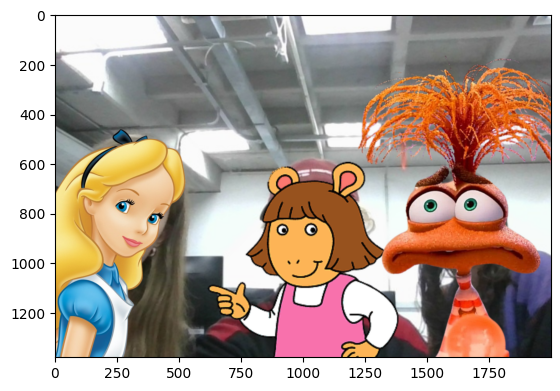

In [15]:
import cv2
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

img = cv2.imread('/content/drive/MyDrive/PDI-2026/Lab2/foto_personagens.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

Foi desenvolvido um sistema utilizando OpenCV para capturar vídeo da webcam e gravar os frames em arquivo .mp4.

Foram realizados quatro testes:

1. Pessoa com movimento lento
2. Pessoa com movimento rápido
3. Objeto com movimento lento
4. Objeto com movimento rápido

In [ ]:
# código completo

### Teste 1 - Pessoa com movimento lento
Frames foram capturados com boa estabilidade; \
Não houve distorções perceptíveis.

### Teste 2 - Pessoa com movimento rápido
Foi observado efeito de motion blur durante movimentos rápidos provavelmente devido à limitação da taxa de quadros.

### Teste 3 - Objetos com movimento lento/rápido
É possível chegar na mesma conclusão dada anteriormente

# 4. Discussão
A qualidade da captura mostrou-se diretamente relacionada à taxa de quadros
configurada. Movimentos rápidos exigem maior FPS para evitar perda de continuidade visual.

# 5. Conclusão

Além da captura do vídeo, a atividade possibilitou a aplicação de conceitos
básicos de manipulação de imagens digitais e organização espacial. Além disso, permitiu compreender, na prática, aspectos fundamentais da
composição visual digital, como resolução e coerência
de iluminação entre elementos distintos.